### 两种解析解

### Eigenvectors-based method(基于特征向量的方法)

In [1]:
import numpy as np
import pandas as pd #一个用于数据操作和分析的库，提供了数据结构和数据分析工具，特别是用于处理表格数据（类似于Excel中的数据表）
import seaborn as sns #一个基于matplotlib的数据可视化库，提供了更高级的接口来绘制统计图表
import matplotlib.pyplot as plt

In [2]:
sns.set(font_scale=1.6) #设置绘图的主题和样式，这里调整字体大小为1.6倍

In [3]:
#MSS的初始状态s_0
x_0 = np.zeros(3)
x_0[0] = 1
#创建一个数组，包含了三个元素，第一个元素为1，其余两个元素为0

In [4]:
lambda_ = 7.26*10**-5
gamma = 2.8 * 10**-5
#设置两个参数的值

In [5]:
#生成概率转移矩阵A
A = np.zeros((3, 3))

A[0, 0] = -2*gamma - lambda_
A[0, 1] = 2*gamma
A[0, 2] = lambda_
A[1, 1] = -1 *(gamma+lambda_)
A[1, 2] = gamma + lambda_
A

array([[-1.286e-04,  5.600e-05,  7.260e-05],
       [ 0.000e+00, -1.006e-04,  1.006e-04],
       [ 0.000e+00,  0.000e+00,  0.000e+00]])

In [6]:
#用于计算矩阵指数函数
def get_e_At(t, A):
    w, S = np.linalg.eig(A)
    S_inv = np.linalg.inv(S)
    
    exp_t = np.exp(t*w)
    M = np.diag(exp_t)
    
    exp_At = np.dot(np.dot(S, M), S_inv)
    
    return exp_At

In [7]:
lb  = 0.0 #下界
ub = 80000 #上界
n_star = 5000+1 #生成点的数量（切去第一个元素后为5000），也就是5000个时刻t
x_star = np.linspace(lb, ub, n_star)[1:] #生成一个从lb到ub的等差数列，包含n_star个元素（代表一个时刻t），切去第一个元素，即0.0

In [8]:
%%time 
# Jupyter Notebook 中的一个魔法命令，用于测量整个单元格的执行时间。它会输出单元格代码执行所花费的总时间，包括 CPU 时间和墙钟时间
#通过遍历x_star中的每个时间点t，计算系统在每个时间点下的可靠性，并将结果存储在val中
val = []
for t in x_star:
    e_At = get_e_At(t, A) #计算矩阵概率转移矩阵A在时间t下的指数函数
    MSS_reliability = np.dot(x_0, e_At) #计算系统在时间t下的可靠性，x_0为初始状态
    
    val.append(MSS_reliability)

CPU times: total: 78.1 ms
Wall time: 78.6 ms


In [9]:
val #val长度为5000，每个元素包含三个数，分别对应三个状态的概率

[array([9.97944515e-01, 8.94358607e-04, 1.16112599e-03]),
 array([0.99589326, 0.00178544, 0.0023213 ]),
 array([0.99384621, 0.00267325, 0.00348053]),
 array([0.99180338, 0.00355781, 0.00463881]),
 array([0.98976474, 0.00443912, 0.00579614]),
 array([0.98773029, 0.00531718, 0.00695252]),
 array([0.98570003, 0.00619201, 0.00810796]),
 array([0.98367394, 0.00706363, 0.00926244]),
 array([0.98165201, 0.00793202, 0.01041597]),
 array([0.97963424, 0.00879721, 0.01156854]),
 array([0.97762062, 0.00965921, 0.01272017]),
 array([0.97561113, 0.01051802, 0.01387085]),
 array([0.97360578, 0.01137365, 0.01502057]),
 array([0.97160455, 0.01222611, 0.01616934]),
 array([0.96960743, 0.01307541, 0.01731716]),
 array([0.96761442, 0.01392156, 0.01846403]),
 array([0.9656255 , 0.01476456, 0.01960994]),
 array([0.96364067, 0.01560443, 0.0207549 ]),
 array([0.96165992, 0.01644117, 0.0218989 ]),
 array([0.95968325, 0.0172748 , 0.02304195]),
 array([0.95771063, 0.01810532, 0.02418405]),
 array([0.95574207, 0.

In [10]:
exact_solution_eigen_vectors = np.array(val) #将val列表转换为numpy数组，其中val长度为5000
exact_solution_eigen_vectors_df = pd.DataFrame(val, columns = ['state_0', 'state_1', 'state_2']) #将val转换为DataFrame格式，列名为state_0, state_1, state_2
exact_solution_eigen_vectors_df.to_csv("analytical_solution_by_eigenvector_method.csv", index=False) #将DataFrame数据exact_solution_eigen_vectors_df保存为CSV文件，文件名为 analytical_solution_by_eigenvector_method.csv
exact_solution_eigen_vectors_df.head() #显示前5行数据

,state_0,state_1,state_2
0,0.997945,0.000894,0.001161
1,0.995893,0.001785,0.002321
2,0.993846,0.002673,0.003481
3,0.991803,0.003558,0.004639
4,0.989765,0.004439,0.005796


In [11]:
exact_solution_eigen_vectors.shape

(5000, 3)

Text(0, 0.5, 'Probability')

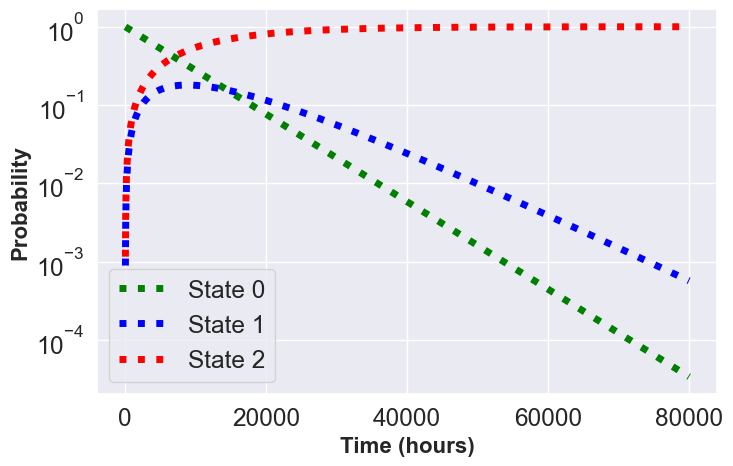

In [12]:
plt.figure(figsize=(8, 5)) #设置图形尺寸为8*5
sns.lineplot(x = x_star.flatten(), y = exact_solution_eigen_vectors[:, 0], label = 'State 0', linewidth = 5, color = 'green', linestyle='dotted') 
#绘制第一条折线图，横坐标为x_star，代表不同的时刻，纵坐标为exact_solution_eigen_vectors数据的第一列，设置这条线的标签为State 0，线宽为5，颜色为绿色，线型为点线
sns.lineplot(x = x_star.flatten(), y = exact_solution_eigen_vectors[:, 1], label = 'State 1', linewidth = 5, color = 'blue', linestyle='dotted')
#绘制第二条折线图，横坐标为x_star，代表不同的时刻，纵坐标为exact_solution_eigen_vectors数据的第二列，设置这条线的标签为State 1，线宽为5，颜色为蓝色，线型为点线
sns.lineplot(x = x_star.flatten(), y = exact_solution_eigen_vectors[:, 2], label = 'State 2', linewidth = 5, color = 'red', linestyle='dotted')
#绘制第三条折线图，横坐标为x_star，代表不同的时刻，纵坐标为exact_solution_eigen_vectors数据的第三列，设置这条线的标签为State 2，线宽为5，颜色为红色，线型为点线

plt.yscale('log') #设置y轴的刻度为对数刻度
plt.xlabel("Time (hours)", fontdict=dict(weight='bold'), fontsize=16) #设置x轴标签为Time (hours)，字体加粗，字体大小为16
plt.ylabel("Probability", fontdict=dict(weight='bold'), fontsize=16) #设置y轴标签为Probability，字体加粗，字体大小为16

### Laplace transform-based method(基于拉普拉斯变换的方法)

In [13]:
import sympy #一个用于符号数学计算的Python库，提供了符号计算、解方程、求导、积分、极限、矩阵运算等功能
from sympy import * #导入所有符号计算相关的函数和类，这使得可以直接使用 sympy 中的所有功能，而无需每次都使用 sympy. 前缀
from sympy.matrices import Matrix, eye, zeros, ones, diag #导入相关矩阵相关的类和函数
import numpy as np
import pandas as pd #一个用于数据操作和分析的库，提供了数据结构和数据分析工具，特别是用于处理表格数据（类似于Excel中的数据表）
import matplotlib.pyplot as plt
import seaborn as sns #一个基于matplotlib的数据可视化库，提供了更高级的接口来绘制统计图表

In [14]:
n=3 

In [15]:
gamma, lambda_ = symbols('gamma, lambda_') #定义两个符号变量，名称分别为gamma和lambda_

In [16]:
#生成概率转移矩阵A（符号表示）
A = Matrix([[-2*gamma - lambda_, 2*gamma, lambda_], [0, -1 *(gamma+lambda_), gamma+lambda_], [0, 0, 0]]); 
A

Matrix([
[-2*gamma - lambda_,          2*gamma,         lambda_],
[                 0, -gamma - lambda_, gamma + lambda_],
[                 0,                0,               0]])

In [17]:
s = symbols('s') #定义一个符号变量s
t = symbols('t', positive=True) #定义一个符号变量t，且t为正数
s

s

In [18]:
I = eye(n) #生成一个n*n的单位矩阵
I

Matrix([
[1, 0, 0],
[0, 1, 0],
[0, 0, 1]])

In [19]:
%%time 
# Jupyter Notebook 中的一个魔法命令，用于测量整个单元格的执行时间。它会输出单元格代码执行所花费的总时间，包括 CPU 时间和墙钟时间

F = sympy.integrals.transforms.inverse_laplace_transform((s*I - A).inv(), s, t, noconds=True) #计算矩阵(s*I - A)的逆的拉普拉斯变换，其中s为拉普拉斯变换的变量，t为时间变量
F

CPU times: total: 250 ms
Wall time: 225 ms


Matrix([
[exp(t*(-2*gamma - lambda_)), 2*gamma*(-exp(-t*(2*gamma**2 + gamma*lambda_)/gamma)/gamma + exp(-t*(gamma**2 + gamma*lambda_)/gamma)/gamma),                                                                   exp(t*(-2*gamma - lambda_)) - 2*exp(t*(-gamma - lambda_)) + 1],
[                          0,                                                                                    exp(t*(-gamma - lambda_)), (gamma + lambda_)*(1/(gamma + lambda_) - exp(-t*(gamma**2 + 2*gamma*lambda_ + lambda_**2)/(gamma + lambda_))/(gamma + lambda_))],
[                          0,                                                                                                            0,                                                                                                                               1]])

In [20]:
lb  = 0.0 #下界
ub = 80000 #上界
n_star = 5000+1 #生成点的数量（切去第一个元素后为5000），也就是5000个时刻t
x_star = np.linspace(lb, ub, n_star)[1:] #生成一个从lb到ub的等差数列，包含n_star个元素（代表一个时刻t），切去第一个元素，即0.0

In [21]:
#MSS的初始状态s_0
x_0 = np.zeros(3) #生成一个包含三个元素的数组，元素值为0
x_0[0] = 1 #将第一个元素的值设为1

In [22]:
%%time 
# Jupyter Notebook 中的一个魔法命令，用于测量整个单元格的执行时间。它会输出单元格代码执行所花费的总时间，包括 CPU 时间和墙钟时间

lambda_val = 7.26*10**-5 #设置参数lambda的值
gamma_val = 2.8 * 10**-5 #设置参数gamma的值

val = [] #定义一个空列表val，用于存储系统在每个时间点下的可靠性
for t_val in x_star: #遍历x_star中的每个时间点t
    state_transition_matrix = np.array(F.subs([(gamma, gamma_val), (lambda_, lambda_val), (t, t_val)])) 
    #使用subs方法将符号矩阵F中的符号变量gamma、lambda_和t分别替换为实际值gamma_val、lambda_val和t_val，这返回一个替换了符号变量后的矩阵。然后将替换后的矩阵转换为数组state_transition_matrix
    MSS_reliability = np.dot(x_0, state_transition_matrix) #计算系统在时间t_val下的可靠性，x_0为初始状态
    MSS_reliability = list(map(float, MSS_reliability)) #将MSS_reliability转换为浮点数列表
    
    val.append(MSS_reliability) #将MSS_reliability添加到val列表中

CPU times: total: 11.9 s
Wall time: 11.9 s


In [23]:
exact_solution_Laplace = np.array(val) #将val列表转换为numpy数组，其中val长度为5000
exact_solution_Laplace_df = pd.DataFrame(val, columns = ['state_0', 'state_1', 'state_2']) #将val转换为DataFrame格式，列名为state_0, state_1, state_2
exact_solution_Laplace_df.to_csv("analytical_solution_by_laplace_method.csv", index=False) #将DataFrame数据exact_solution_Laplace_df保存为CSV文件，文件名为 analytical_solution_by_laplace_method.csv
exact_solution_Laplace_df.head() #显示前5行数据

,state_0,state_1,state_2
0,0.997945,0.000894,0.001161
1,0.995893,0.001785,0.002321
2,0.993846,0.002673,0.003481
3,0.991803,0.003558,0.004639
4,0.989765,0.004439,0.005796


Text(0, 0.5, 'Probability')

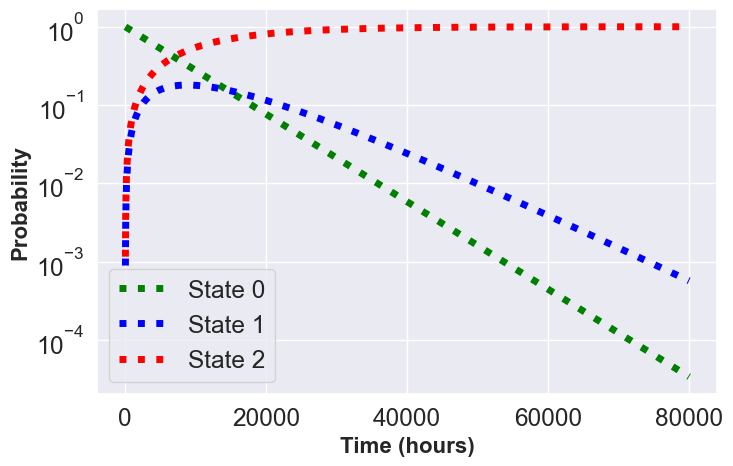

In [24]:
plt.figure(figsize=(8, 5)) #设置图形尺寸为8*5

sns.lineplot(x = x_star.flatten(), y = exact_solution_Laplace[:, 0], label = 'State 0', linewidth = 5, color = 'green', linestyle='dotted')
#绘制第一条折线图，横坐标为x_star，代表不同的时刻，纵坐标为exact_solution_Laplace数据的第一列，设置这条线的标签为State 0，线宽为5，颜色为绿色，线型为点线
sns.lineplot(x = x_star.flatten(), y = exact_solution_Laplace[:, 1], label = 'State 1', linewidth = 5, color = 'blue', linestyle='dotted')
#绘制第二条折线图，横坐标为x_star，代表不同的时刻，纵坐标为exact_solution_Laplace数据的第二列，设置这条线的标签为State 1，线宽为5，颜色为蓝色，线型为点线
sns.lineplot(x = x_star.flatten(), y = exact_solution_Laplace[:, 2], label = 'State 2', linewidth = 5, color = 'red', linestyle='dotted')
#绘制第三条折线图，横坐标为x_star，代表不同的时刻，纵坐标为exact_solution_Laplace数据的第三列，设置这条线的标签为State 2，线宽为5，颜色为红色，线型为点线

plt.yscale('log') #设置y轴的刻度为对数刻度
plt.xlabel("Time (hours)", fontdict=dict(weight='bold'), fontsize=16) #设置x轴标签为Time (hours)，字体加粗，字体大小为16
plt.ylabel("Probability", fontdict=dict(weight='bold'), fontsize=16) #设置y轴标签为Probability，字体加粗，字体大小为16